In [1]:
import csv

import numpy as np
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
#First set of usable data - from Logan Schmidt using James Tattersall's sheets
!head one.csv

-13	1	12/01/48	An Esteemed Correspondent	J. Alsop ;Digamma *;Thomas Cranstoun *;John Giblin *;J.M. *	1;	Jan-49;	xx;xx	41;
-12	1	01/01/49	T. Morley	Unknown ;T.J.L. 	1;	Feb-49;Feb-49	xx;xx	9;
-11	1	02/01/49	T.J.L. 	J.W. 	1	03/01/49	xx	41
-10	1	02/01/49	Enquirer	T. Morley 	1	03/01/49	xx	22
-9	1	03/01/49	Thomas Morley	J.W. 	1	04/01/49	xx	22
-8	1	04/01/49	Thomas Morley	UNKNOWN;UNKNOWN	1;1	May-49;Jun-49	xx;xx	41;
-7	1	04/01/49	Collegian	J.W. 	1	05/01/49	xx	22
-6	1	05/01/49	Gomphos					3
-5	1	05/01/49	S.A.G.					74
-4	1	06/01/49	Geometricus	 UNKNOWN	1	07/01/49	xx	47


In [3]:
#first create list using all columns
allData = []
with open('one.csv', 'r') as f:
    filereader = csv.reader(f, delimiter="\t", quotechar='"')
    #next(filereader) # skips header row, we don't want to skip since we don't have a header
    for row in filereader:
            allData.append(row)
            #for this practice, lets keep seperate data by ranges of dates and we can compare them!  nifty!
fortyNine = []
edge = []
i=0
for x in allData:
    date=x[2].split("/")
    if len(date)==3:
        if date[2]=="49":
            edge.append([x[3],x[4]])
            fortyNine.append(edge[i])
            i=i+1
#fix the solver column!
fixedSolver = []
edge = []
i=0
#once sorted for date, we can remove whitespace
#I done like using replace, but couldn't get split to work :( sad - this should be ok for now

#can add to this array of strings as we find more ways that James Tattersall labeled unknown authors
unknown = {"", "Unknown", "unknown"}
for x in fortyNine:
    if ";" in x[1]:
        solvers = x[1].split(";")
        for y in solvers:
            one=x[0].replace(' ', '')
            two=y.replace(' ', '')
            if(one in unknown):
                one="UNKNOWN"
            if(two in unknown):
                two="UNKNOWN"
            fixedSolver.append([one,two])
    else:
        one=x[0].replace(' ', '')
        two=x[1].replace(' ', '')
        if(one in unknown):
            one="UNKNOWN"
        if(two in unknown):
            two="UNKNOWN"
        fixedSolver.append([one,two])
    #i=i+1

In [4]:
fixedSolver

[['T.Morley', 'UNKNOWN'],
 ['T.Morley', 'T.J.L.'],
 ['T.J.L.', 'J.W.'],
 ['Enquirer', 'T.Morley'],
 ['ThomasMorley', 'J.W.'],
 ['ThomasMorley', 'UNKNOWN'],
 ['ThomasMorley', 'UNKNOWN'],
 ['Collegian', 'J.W.'],
 ['Gomphos', 'UNKNOWN'],
 ['S.A.G.', 'UNKNOWN'],
 ['Geometricus', 'UNKNOWN'],
 ['UNKNOWN', 'J.W.'],
 ['Geometricus', 'UNKNOWN'],
 ['J.W.', 'UNKNOWN'],
 ['Geometricus', 'ThomasWilkinson'],
 ['Philo-Mathematicus', 'ThomasWilkinson'],
 ['UNKNOWN', 'UNKNOWN'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['Geometricus', 'ThomasWilkinson'],
 ['UNKNOWN', 'J.S.'],
 ['UNKNOWN', 'ThomasWilkinson*'],
 ['UNKNOWN', 'J.M.[ofBiggleswade]*'],
 ['UNKNOWN', 'J.S.'],
 ['UNKNOWN', 'ThomasWilkinson*'],
 ['UNKNOWN', 'J.M.[ofBiggleswade]*'],
 ['ThomasMorley', 'J.S.'],
 ['ThomasMorley', 'ThomasWilkinson*'],
 ['ThomasMorley', 'J.M.[fromPlymouth]*'],
 ['ThomasWilkinson', 'Tho

In [5]:
# Create empty graph using networkx
#MT = nx.Graph()
#create graph using networkx
MT = nx.from_edgelist(fixedSolver)
#information about nodes and links
print(nx.info(MT))

Name: 
Type: Graph
Number of nodes: 22
Number of edges: 31
Average degree:   2.8182


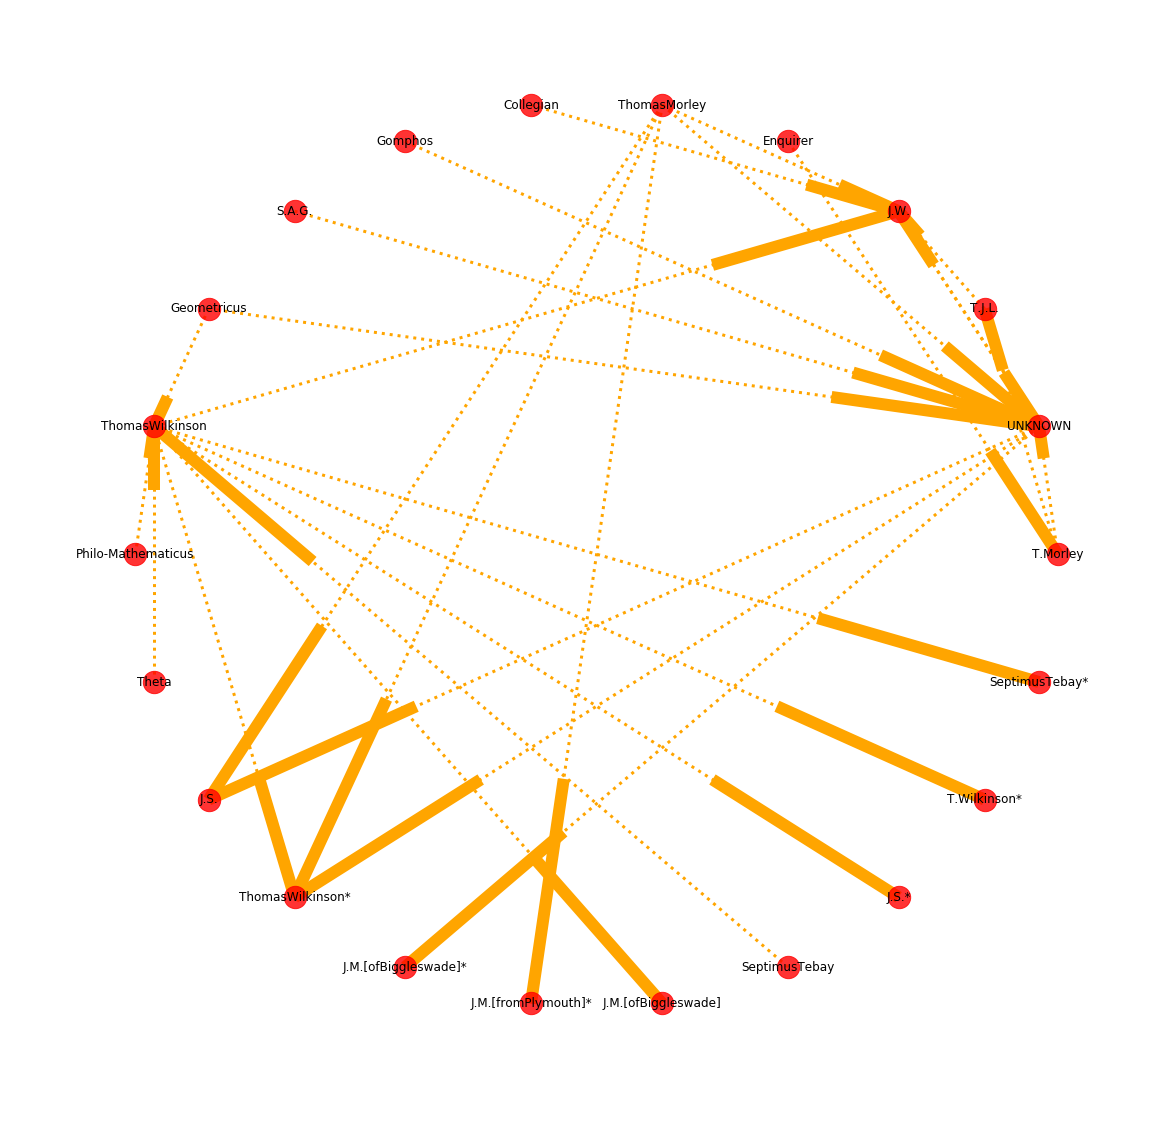

In [6]:
#initial digraph for our proposers and solvers
#thick lines are on the side of the solver
MTd = nx.DiGraph()
MTd.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(MTd)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(MTd, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(MTd, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(MTd, pos=layout, font_size=12)

#plt.show()
plt.savefig("week5solverDiGraph.png", format="PNG")

In [7]:
wilkinson = []
for x in fixedSolver:
    if(x[0]=="ThomasWilkinson" or x[1]=="ThomasWilkinson"):
        wilkinson.append(x)

In [8]:
wilkinson

[['Geometricus', 'ThomasWilkinson'],
 ['Philo-Mathematicus', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['Geometricus', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'J.M.[ofBiggleswade]'],
 ['ThomasWilkinson', 'ThomasWilkinson*'],
 ['ThomasWilkinson', 'J.W.'],
 ['ThomasWilkinson', 'J.S.*'],
 ['ThomasWilkinson', 'T.Wilkinson*'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'J.S.*'],
 ['ThomasWilkinson', 'SeptimusTebay*'],
 ['SeptimusTebay', 'ThomasWilkinson']]

In [9]:
# Create empty graph using networkx
#MT = nx.Graph()
#create graph using networkx
Wd = nx.from_edgelist(fixedSolver)
#information about nodes and links
print(nx.info(Wd))

Name: 
Type: Graph
Number of nodes: 22
Number of edges: 31
Average degree:   2.8182


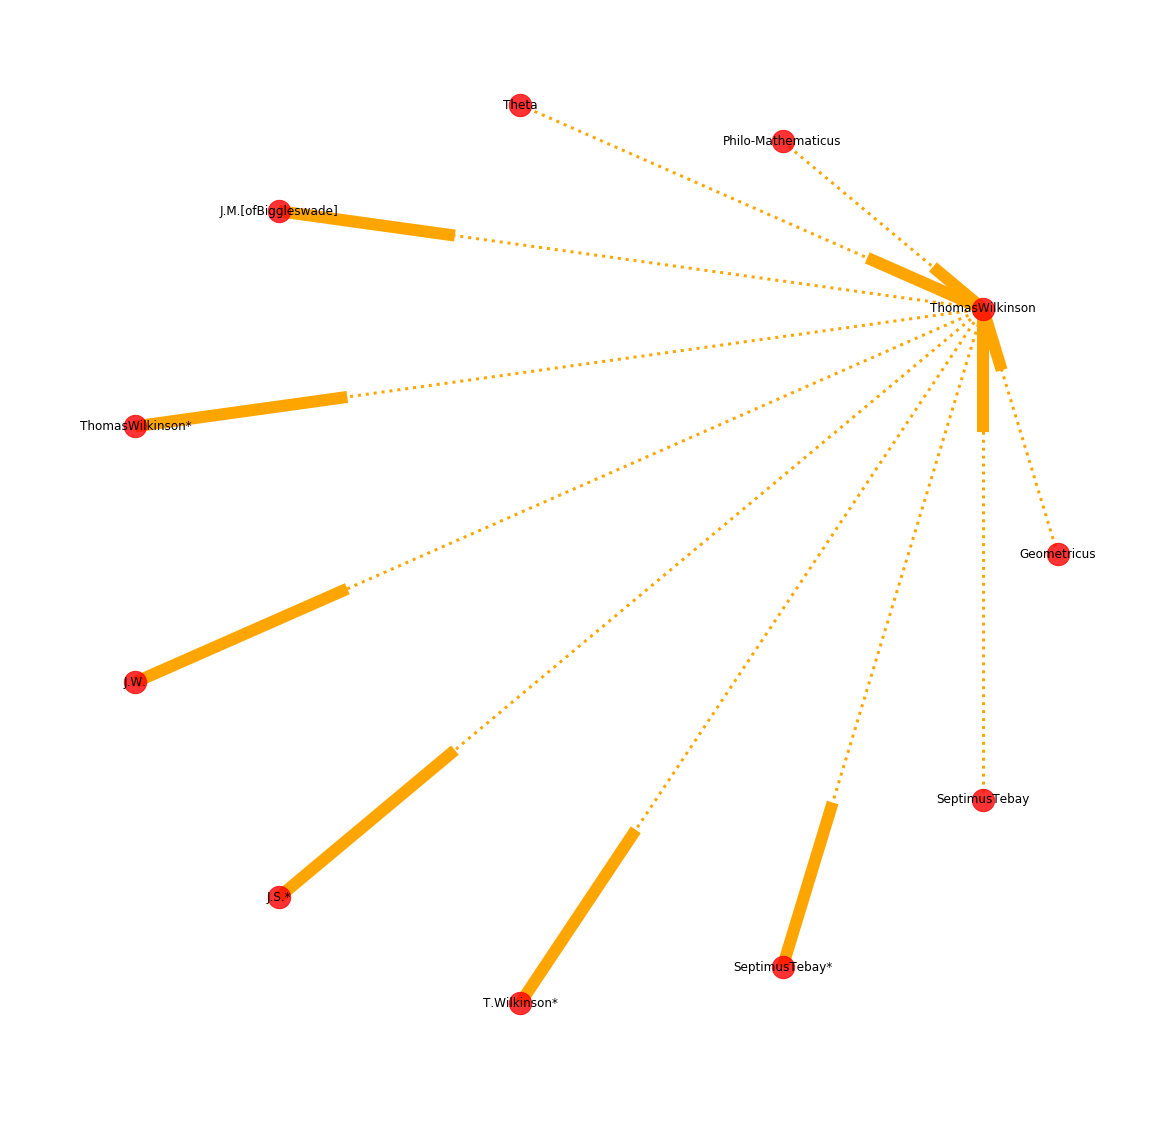

In [10]:
#Wilkinson digraph
#thick lines are on the side of the solver
Wd = nx.DiGraph()
Wd.add_edges_from(wilkinson)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(Wd)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(Wd, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(Wd, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(Wd, pos=layout, font_size=12)

#plt.show()
plt.savefig("week5wilkinsonDiGraph.png", format="PNG")

#I now have two lists and two initial graphs for comparison to work with!

DEGREE CENTRALITY

In [11]:
#only counts the number of people connected to, not the number of times connected to each
#degree list for one.csv for 1849
MTdegrees=list(MT.degree)
MTdegrees

[('T.Morley', 3),
 ('UNKNOWN', 11),
 ('T.J.L.', 2),
 ('J.W.', 5),
 ('Enquirer', 1),
 ('ThomasMorley', 5),
 ('Collegian', 1),
 ('Gomphos', 1),
 ('S.A.G.', 1),
 ('Geometricus', 4),
 ('ThomasWilkinson', 12),
 ('Philo-Mathematicus', 1),
 ('Theta', 1),
 ('J.S.', 2),
 ('ThomasWilkinson*', 3),
 ('J.M.[ofBiggleswade]*', 1),
 ('J.M.[fromPlymouth]*', 1),
 ('J.M.[ofBiggleswade]', 1),
 ('SeptimusTebay', 3),
 ('J.S.*', 1),
 ('T.Wilkinson*', 1),
 ('SeptimusTebay*', 1)]

In [12]:
#sorted 1849
MTdegrees.sort(key=lambda x: x[1],reverse=True)
MTdegrees

[('ThomasWilkinson', 12),
 ('UNKNOWN', 11),
 ('J.W.', 5),
 ('ThomasMorley', 5),
 ('Geometricus', 4),
 ('T.Morley', 3),
 ('ThomasWilkinson*', 3),
 ('SeptimusTebay', 3),
 ('T.J.L.', 2),
 ('J.S.', 2),
 ('Enquirer', 1),
 ('Collegian', 1),
 ('Gomphos', 1),
 ('S.A.G.', 1),
 ('Philo-Mathematicus', 1),
 ('Theta', 1),
 ('J.M.[ofBiggleswade]*', 1),
 ('J.M.[fromPlymouth]*', 1),
 ('J.M.[ofBiggleswade]', 1),
 ('J.S.*', 1),
 ('T.Wilkinson*', 1),
 ('SeptimusTebay*', 1)]

In [13]:
#degrees for Wilkinson during 1849
Wdegrees=list(Wd.degree)
Wdegrees

[('Geometricus', 1),
 ('ThomasWilkinson', 12),
 ('Philo-Mathematicus', 1),
 ('Theta', 1),
 ('J.M.[ofBiggleswade]', 1),
 ('ThomasWilkinson*', 1),
 ('J.W.', 1),
 ('J.S.*', 1),
 ('T.Wilkinson*', 1),
 ('SeptimusTebay*', 1),
 ('SeptimusTebay', 1)]

In [14]:
#sorted Wilkinson
Wdegrees.sort(key=lambda x: x[1],reverse=True)
Wdegrees

[('ThomasWilkinson', 12),
 ('Geometricus', 1),
 ('Philo-Mathematicus', 1),
 ('Theta', 1),
 ('J.M.[ofBiggleswade]', 1),
 ('ThomasWilkinson*', 1),
 ('J.W.', 1),
 ('J.S.*', 1),
 ('T.Wilkinson*', 1),
 ('SeptimusTebay*', 1),
 ('SeptimusTebay', 1)]

T.Morley UNKNOWN 1
T.Morley T.J.L. 1
T.J.L. J.W. 1
Enquirer T.Morley 1
ThomasMorley J.W. 1
ThomasMorley UNKNOWN 2
ThomasMorley UNKNOWN 2
Collegian J.W. 1
Gomphos UNKNOWN 1
S.A.G. UNKNOWN 1
Geometricus UNKNOWN 2
UNKNOWN J.W. 1
Geometricus UNKNOWN 2
J.W. UNKNOWN 1
Geometricus ThomasWilkinson 2
Philo-Mathematicus ThomasWilkinson 1
UNKNOWN UNKNOWN 1
Theta ThomasWilkinson 3
Theta ThomasWilkinson 3
Theta ThomasWilkinson 3
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson ThomasWilkinson 5
Geometricus ThomasWilkinson 2
UNKNOWN J.S. 2
UNKNOWN ThomasWilkinson* 2
UNKNOWN J.M.[ofBiggleswade]* 2
UNKNOWN J.S. 2
UNKNOWN ThomasWilkinson* 2
UNKNOWN J.M.[ofBiggleswade]* 2
ThomasMorley J.S. 1
ThomasMorley ThomasWilkinson* 1
ThomasMorley J.M.[fromPlymouth]* 1
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson J.M.[ofBiggleswade] 1
ThomasWilkinson ThomasWilkinson* 1
SeptimusTebay SeptimusTebay 2
Geometricus Geometricus 2
ThomasWilkinson J.W. 1
ThomasWilkinson J.S.* 2
Thoma

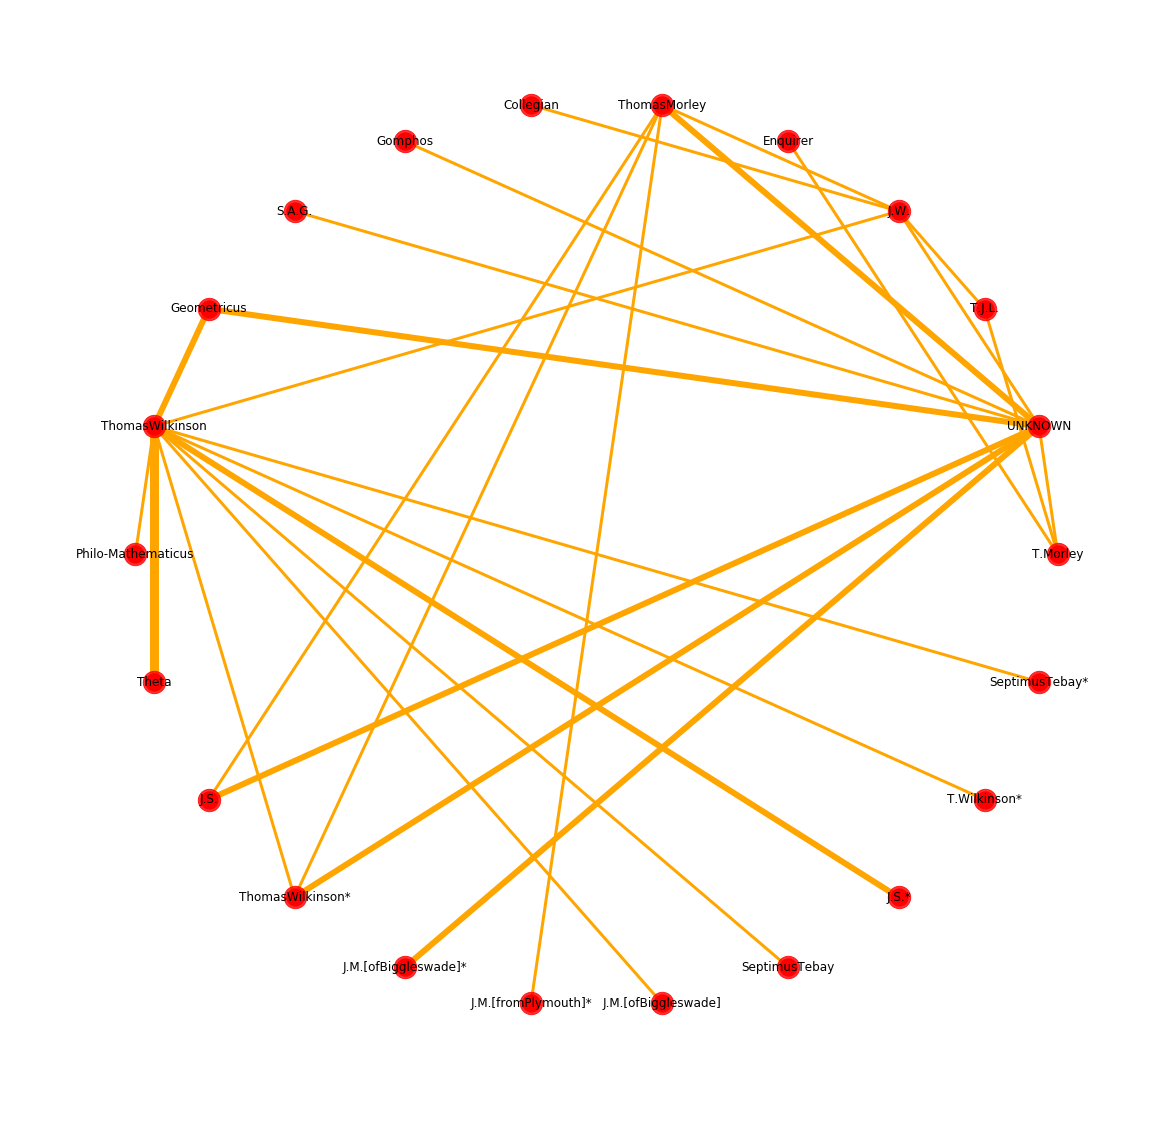

In [15]:
#need a method that takes unique authors and parses list while counting number of times an edge occurs
#between them and the same person, then use that as a weight

#g.add_edge(1,2, attr_dict={ 'thickness': 20})
#edge_thickness = [attribs['thickness'] for (v_from, v_to, attribs) in g.edges(data=True)]
#LIGHT_BLUE = '#A0CBE2'
#nx.draw(g, 
#node_size = node_size,   
#width = edge_thickness,
#node_color = LIGHT_BLUE,
#edge_color = LIGHT_BLUE,
#font_size = 15,
#with_labels = True)

#lets try using fixedSolver...
weighted = nx.Graph()
for x in fixedSolver:
    num=0;
    for solver in fixedSolver:
        if (x[1]==solver[1]) and (x[0]==solver[0]):
            num=num+1
    print(x[0],x[1],num)
    num=num*3;
    weighted.add_edge(x[0],x[1], weight=num)

    
#width, length
plt.figure(figsize=(20,20))
plt.axis('off')
    
# generate the layout and place nodes and edges
layout = nx.circular_layout(weighted)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(weighted, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_labels(weighted, pos=layout, font_size=12)

edges = weighted.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [weighted[u][v]['weight'] for u,v in edges]

nx.draw(weighted, pos=layout, edges=edges, width=weights, edge_color='orange')

plt.savefig("week5oneConnections.png", format="PNG")

Geometricus ThomasWilkinson 2
Philo-Mathematicus ThomasWilkinson 1
Theta ThomasWilkinson 3
Theta ThomasWilkinson 3
Theta ThomasWilkinson 3
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson ThomasWilkinson 5
Geometricus ThomasWilkinson 2
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson J.M.[ofBiggleswade] 1
ThomasWilkinson ThomasWilkinson* 1
ThomasWilkinson J.W. 1
ThomasWilkinson J.S.* 2
ThomasWilkinson T.Wilkinson* 1
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson J.S.* 2
ThomasWilkinson SeptimusTebay* 1
SeptimusTebay ThomasWilkinson 1


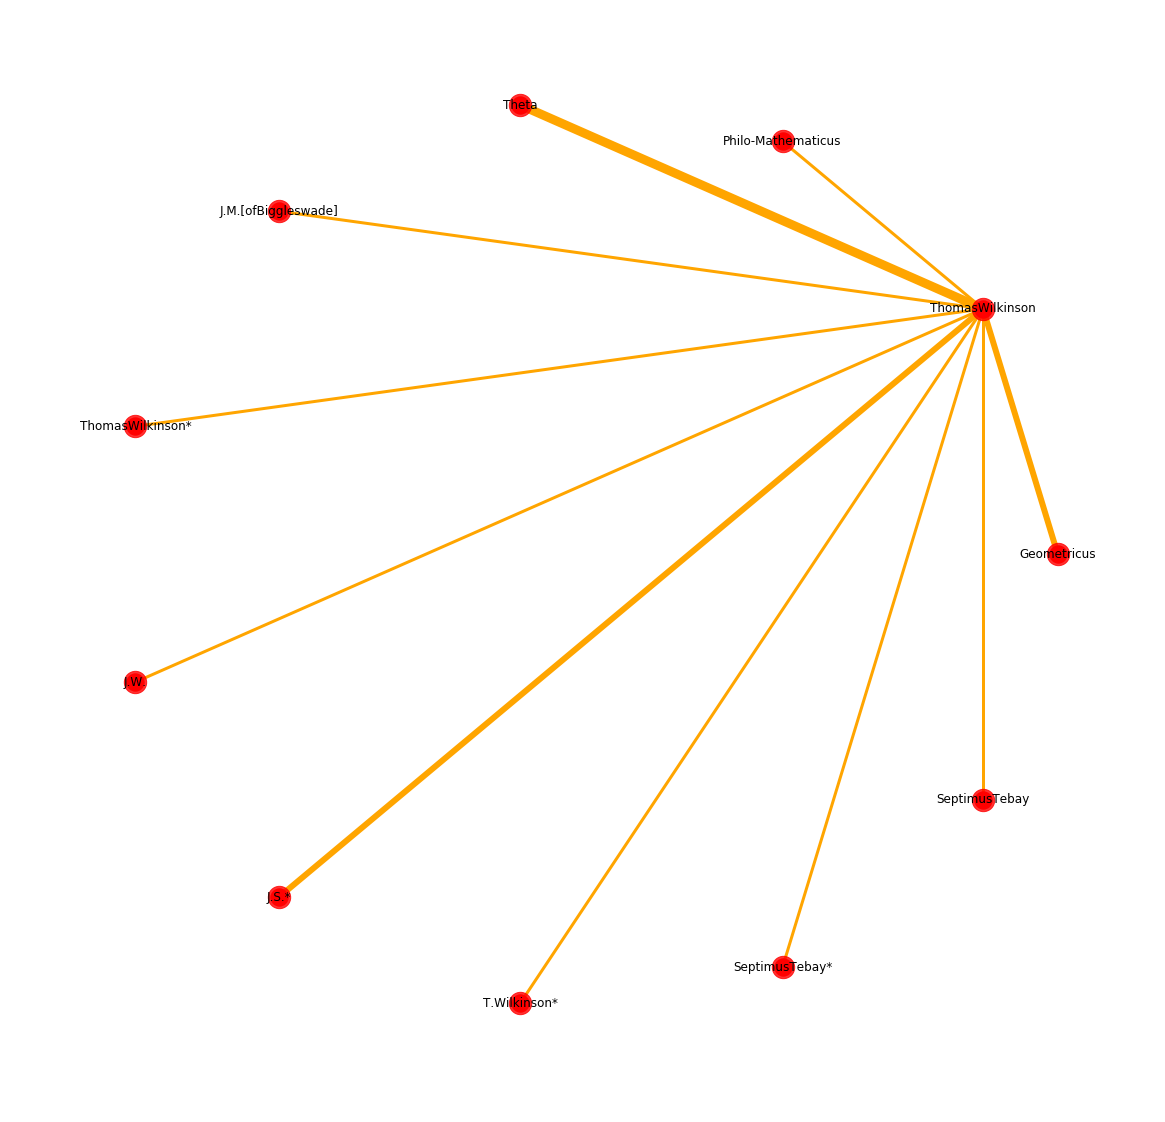

In [16]:
#NOTICING HERE THAT I NEED A WAY TO SHOW A NODE LOOPING TO ITSELF - Maybe node size??
#lets try using Wilkinson...
weightedW = nx.Graph()
for x in wilkinson:
    num=0;
    for solver in wilkinson:
        if (x[1]==solver[1]) and (x[0]==solver[0]):
            num=num+1
    print(x[0],x[1],num)
    num=num*3;
    weightedW.add_edge(x[0],x[1], weight=num)

    
#width, length
plt.figure(figsize=(20,20))
plt.axis('off')
    
# generate the layout and place nodes and edges
layout = nx.circular_layout(weightedW)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(weightedW, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_labels(weightedW, pos=layout, font_size=12)

edges = weightedW.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [weightedW[u][v]['weight'] for u,v in edges]

nx.draw(weightedW, pos=layout, edges=edges, width=weights, edge_color='orange')

plt.savefig("week5wilkinsonConnections.png", format="PNG")

In [17]:
betweennessMT = nx.betweenness_centrality(MT)
betweennessMT

{'Collegian': 0.0,
 'Enquirer': 0.0,
 'Geometricus': 0.07746031746031745,
 'Gomphos': 0.0,
 'J.M.[fromPlymouth]*': 0.0,
 'J.M.[ofBiggleswade]': 0.0,
 'J.M.[ofBiggleswade]*': 0.0,
 'J.S.': 0.0,
 'J.S.*': 0.0,
 'J.W.': 0.3045238095238096,
 'Philo-Mathematicus': 0.0,
 'S.A.G.': 0.0,
 'SeptimusTebay': 0.0,
 'SeptimusTebay*': 0.0,
 'T.J.L.': 0.028571428571428574,
 'T.Morley': 0.10912698412698414,
 'T.Wilkinson*': 0.0,
 'Theta': 0.0,
 'ThomasMorley': 0.12357142857142858,
 'ThomasWilkinson': 0.5797619047619048,
 'ThomasWilkinson*': 0.12317460317460319,
 'UNKNOWN': 0.4490476190476189}

In [18]:
#NOTICING HERE THAT I NEED A WAY TO SHOW A NODE LOOPING TO ITSELF
#lets try using fixedSolver to change node size.... STILL WORKING ON THIS, DOES NOT WORK YET!
  
for x in fixedSolver;
    for y in betweennessMT:
        print(y[1])
    
#width, length
plt.figure(figsize=(20,20))
plt.axis('off')
    
# generate the layout and place nodes and edges
layout = nx.circular_layout(weightedW)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(weightedW, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_labels(weightedW, pos=layout, font_size=12)

edges = weightedW.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [weightedW[u][v]['weight'] for u,v in edges]

nx.draw(weightedW, pos=layout, edges=edges, width=weights, edge_color='orange')

plt.savefig("week5wilkinsonConnections.png", format="PNG")

SyntaxError: invalid syntax (<ipython-input-18-1829f7cfb2ad>, line 4)